In [54]:
# Import necessary libraries for data acquistion and prep
import pandas as pd
import numpy as np

#Import for data viz
import seaborn as sns
import matplotlib.pyplot as plt

# Import for data acquisition and prep
import wrangle

# import for split and scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Import for Feature engineering
from sklearn.feature_selection import SelectKBest, f_regression, RFE
import statsmodels.api as sm
from sklearn.linear_model import LassoCV, MultiTaskLassoCV

# Import models
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor,LocalOutlierFactor

# Import for model evaluation
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from math import sqrt

# Set display options so that we can view all the data
pd.options.display.max_columns = None
pd.options.display.max_rows = None

import warnings
warnings.filterwarnings('ignore')

# Acquire

In [2]:
# Create function for acquisition and copy to wrangle.py for further use
# def get_zillow_data(use_cache=True):
#     '''
#     This functions recieves a boolean as input to see if the user wants to recieve a fresh copy from the database.
#     Then the fucntion checks to see if the file being requested already exists.
#     Runs a query for the data using the assigned url.
#     Creates a new csv if needed.
#     Then returns the zillow dataframe.
#     '''
    
#     # Assign filename to csv for storage
#     filename = 'zillow.csv'
    
#     # Check if file exists and if user wants a fresh copy from the database
#     if os.path.exists(filename) and use_cache:
#         print('Using cached csv file...')
#         return pd.read_csv(filename)
    
#     # Notify user of next step
#     print('Retrieving from database...')
    
#     # Assign url
#     url = get_db_url('zillow')
    
#     # Run query for data
#     zillow_data = pd.read_sql('''
#     SELECT bedroomcnt,\
#     bathroomcnt,\
#     calculatedfinishedsquarefeet,\
#     taxvaluedollarcnt,\
#     yearbuilt,\
#     fips,\
#     FROM properties_2017
#     JOIN predictions_2017
#     USING(parcelid)
#     JOIN propertylandusetype
#     USING(propertylandusetypeid)
#     WHERE propertylandusetypeid = 261 
#     ''', url)
    
#     # Notify user of next step
#     print('Saving new csv...')
    
#     # Create csv
#     zillow_data.to_csv(filename, index=False)
    
#     # Return DataFrame
#     return zillow_data

In [55]:
# Test new function in wrangle.py and assign to dataframe
zillow = wrangle.get_zillow_data()
zillow.shape

Using cached csv file...


(52442, 6)

**Summarize**:

In [18]:
zillow.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,fips
0,4.0,3.5,3100.0,1023282.0,1998.0,6059.0
1,2.0,1.0,1465.0,464000.0,1967.0,6111.0
2,3.0,2.0,1243.0,564778.0,1962.0,6059.0
3,4.0,3.0,2376.0,145143.0,1970.0,6037.0
4,4.0,3.0,2962.0,773303.0,1950.0,6037.0


In [5]:
# Check Datatypes and nulls
# zillow.info(null_counts=True)

In [6]:
# zillow.shape

In [7]:
# zillow.describe()

In [8]:
# for col in zillow.columns[zillow.dtypes=='float']:
#     zillow[col].hist()
#     plt.title(col)
#     plt.show()

In [9]:
# for col in zillow.columns[zillow.dtypes=='float']:
#     sns.boxplot(zillow[col])
#     plt.title(col)
#     plt.show()

In [10]:
#zillow.transactiondate.value_counts()

- Summary: Lots of nulls and outliers, fips is only 3 numbers so is most likely categorical. Majority of bed and bath rooms are under 6

# Prep

In [ ]:
# zillow.isnull().sum()

In [ ]:
# Rename columns
# zillow = zillow.rename(columns={'bedroomcnt' : 'bedrooms',\
#                             'bathroomcnt' : 'bathrooms',\
#                             'calculatedfinishedsquarefeet' : 'area',\
#                             'taxvaluedollarcnt' : 'taxable_value',\
#                             'yearbuilt' : 'year_built',\
#                             'fips' : 'county'})

In [ ]:
# Drop Nulls
# zillow = zillow.dropna()

In [ ]:
# Map county values to name of county
# zillow.county = zillow.county.map({6037.0 : 'los_angeles_ca',\
#                                    6059.0 : 'orange_ca',\
#                                    6111.0 : 'ventura_ca'})

In [ ]:
# Create a variable that shows the age of the house in 2017
# zillow['house_age_2017'] = 2017 - zillow.year_built 

In [ ]:
# One hot encode county 

# Get dummy variables
# dummy_name = pd.get_dummies(zillow[['county']])

# Concat dummy_name to dataframe
# zillow = pd.concat([zillow,dummy_name],axis=1)

In [ ]:
# Create a variable that show the ratio of bedrooms to bathrooms
# zillow['bed_to_bath_ratio'] = zillow.bedrooms / zillow.bathrooms
# Replace infinite values with NaN to be dropped later
# zillow = zillow.replace(np.inf, np.nan)

In [ ]:
# Create into function and copy to wrangle.py for futher use
# def prep_zillow(use_cache=True):
#     '''
#     function used to wrangle zillow data
#     '''
#     # Get Zillow data
#     zillow = get_zillow_data(use_cache)
        
#     # Rename columns
#     zillow = zillow.rename(columns={'bedroomcnt' : 'bedrooms',\
#                                 'bathroomcnt' : 'bathrooms',\
#                                 'calculatedfinishedsquarefeet' : 'area',\
#                                 'taxvaluedollarcnt' : 'taxable_value',\
#                                 'yearbuilt' : 'year_built',\
#                                 'fips' : 'county'})
    
#     # Create a variable that show the ratio of bedrooms to bathrooms
#     zillow['bed_to_bath_ratio'] = zillow.bedrooms / zillow.bathrooms
    
#     # Replace infinite values with NaN to be dropped later
#     zillow = zillow.replace(np.inf, np.nan)

#     # Create a variable that shows the age of the house in 2017
#     zillow['house_age_2017'] = 2017 - zillow.year_built 

#     # Drop Nulls
#     zillow = zillow.dropna()
    
#     # Map county values to name of county
#     zillow.county = zillow.county.map({6037.0 : 'los_angeles_ca',\
#                                        6059.0 : 'orange_ca',\
#                                        6111.0 : 'ventura_ca'})
    
#     # One hot encode county 

#     # Get dummy variables
#     dummy_name = pd.get_dummies(zillow[['county']])

#     # Concat dummy_name to dataframe
#     zillow = pd.concat([zillow,dummy_name],axis=1)
    
#     return zillow

In [56]:
# Test wrangle.py function and assign to dataframe
zillow = wrangle.prep_zillow(zillow)
zillow.head()

,bedrooms,bathrooms,area,taxable_value,year_built,county,house_age_2017,bed_to_bath_ratio,county_los_angeles_ca,county_orange_ca,county_ventura_ca
0,4.0,3.5,3100.0,1023282.0,1998.0,orange_ca,19.0,1.142857,0,1,0
1,2.0,1.0,1465.0,464000.0,1967.0,ventura_ca,50.0,2.000000,0,0,1
2,3.0,2.0,1243.0,564778.0,1962.0,orange_ca,55.0,1.500000,0,1,0
3,4.0,3.0,2376.0,145143.0,1970.0,los_angeles_ca,47.0,1.333333,1,0,0
4,4.0,3.0,2962.0,773303.0,1950.0,los_angeles_ca,67.0,1.333333,1,0,0


- Summary: fips is a county code. Names were changed and nulls were dropped.

# Outliers

In [11]:
# zillow.describe()

In [15]:
# fig, ax = plt.subplots(ncols=5, sharey=True, sharex=True, figsize=(30,10))
# sns.boxplot(x='bedroomcnt', data=zillow, ax=ax[0])
# sns.boxplot(x='bathroomcnt', data=zillow, ax=ax[1])
# sns.boxplot(x='yearbuilt', data=zillow, ax=ax[2])
# sns.boxplot(x='calculatedfinishedsquarefeet', data=zillow, ax=ax[3])
# sns.boxplot(x='taxvaluedollarcnt', data=zillow, ax=ax[4])
# plt.show()

Lots of outliers. Biggest range in taxable_value but they all have it.

In [13]:
# def remove_outliers(df, column_list):
#     ''' remove outliers from dataframe 
#         then return that dataframe
#     '''
#     # Iterate through column_list
#     for col in column_list:
        
#         # find percentiles
#         q_25 = np.percentile(df[col], 25)
#         q_75 = np.percentile(df[col], 75)
        
#         # Calculate IQR
#         iqr = q_75 - q_25
        
#         # assign upper bound
#         upper_bound = q_75 + 1.5 * iqr   
        
#         # assign lower bound 
#         lower_bound = q_25 - 1.5 * iqr   

#         # assign df without outliers
#         df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
        
#     # return dataframe without outliers    
#     return df

In [57]:
zillow = wrangle.remove_outliers(zillow, ['bedrooms','bathrooms','year_built','area','taxable_value','house_age_2017','bed_to_bath_ratio'])
zillow.shape

(41484, 11)

# Split

In [23]:
# Values are split into train, validate, split for further exploratation
# train_validate, test = train_test_split(zillow, random_state=1729, test_size=0.2)
# train, validate = train_test_split(train_validate, random_state=1729, test_size=0.2)

In [24]:
# Create function to split data and copy to wrangle.py for further use
# def split_zillow(df):
#     '''
#     This funciton splits the dataset for modeling into:
#     train - for exploring the data, and fitting the models
#     validate - for ensuring the model is not overfit
#     test - for testing the model on unseen data
#     '''
#     # This seperates out the test data from the train and validate data. Test makes up 20 % of the data.
#     train_validate, test = train_test_split(zillow, random_state=1729, test_size=0.2)
    
#     # This seperates out the train and validates sets. Train makes up 56 % of the data and Validate makes up 24 %.
#     train, validate = train_test_split(train_validate, random_state=1729, test_size=0.3)
    
#     # The funciton returns the split sets
#     return train, validate, test

In [58]:
# Test new function in wrangle.py and assign to dataframes
train, validate, test = wrangle.split_zillow(zillow)
train.head()

,bedrooms,bathrooms,area,taxable_value,year_built,county,house_age_2017,bed_to_bath_ratio,county_los_angeles_ca,county_orange_ca,county_ventura_ca
24182,3.0,3.0,2439.0,316700.0,1988.0,los_angeles_ca,29.0,1.00,1,0,0
37682,3.0,2.0,1202.0,153066.0,1973.0,orange_ca,44.0,1.50,0,1,0
1666,3.0,2.0,1407.0,82563.0,1964.0,orange_ca,53.0,1.50,0,1,0
41060,2.0,1.0,708.0,158210.0,1948.0,orange_ca,69.0,2.00,0,1,0
39531,5.0,4.0,2296.0,206128.0,1958.0,los_angeles_ca,59.0,1.25,1,0,0


# Model split (X_train,y_train)

In [26]:
# # Assign x_train for modeling, y_train as target for modeling
# X_train = train.drop(columns=['taxable_value'])
# y_train = train[['taxable_value']]

# X_validate = validate.drop(columns=['taxable_value'])
# y_validate = validate[['taxable_value']]

# X_test = test.drop(columns=['taxable_value'])
# y_test = test[['taxable_value']]

# X_train.head()

In [27]:
# def model_split(df):
    
#     # Assign x for testing the model, y as target for modeling
#     X = df.drop(columns=['taxable_value'])
#     y = df[['taxable_value']]
    
#     return X, y

In [59]:
X_train, y_train = wrangle.model_split(train)

X_validate, y_validate = wrangle.model_split(validate)

X_test, y_test = wrangle.model_split(test)

# Scale

In [29]:
# Create function to scale data 
# def scale_data(train, validate, test, return_scaler=False):
#     '''
#     This function scales the split data and returns a scaled version of the dataset.
    
#     If return_scaler is true, the scaler will be returned as well.
#     '''
    
#     col = train.columns[train.dtypes == 'float']
#     col = col.append(train.columns[train.dtypes == 'int'])

#     train_scaled = train[col]
#     validate_scaled = validate[col]
#     test_scaled = test[col]

#     scaler = MinMaxScaler()
#     scaler.fit(train[col])
    
#     train_scaled[col] = scaler.transform(train[col])
#     validate_scaled[col] = scaler.transform(validate[col])
#     test_scaled[col] = scaler.transform(test[col])
    
#     if return_scaler:
#         return train_scaled, validate_scaled, test_scaled, scaler
#     else:
#         return train_scaled, validate_scaled, test_scaled

In [60]:
# Scale the data for modeling
X_train_scaled, X_validate_scaled, X_test_scaled = wrangle.scale_data(X_train,X_validate,X_test)

In [61]:
X_train_scaled.head()

,bedrooms,bathrooms,area,year_built,house_age_2017,bed_to_bath_ratio
24182,0.333333,0.666667,0.635397,0.742857,0.257143,0.230769
37682,0.333333,0.333333,0.236622,0.600000,0.400000,0.461538
1666,0.333333,0.333333,0.302708,0.514286,0.485714,0.461538
41060,0.000000,0.000000,0.077369,0.361905,0.638095,0.692308
39531,1.000000,1.000000,0.589297,0.457143,0.542857,0.346154


# Explore

## Hypothesize

- Does county affect price?
- Does the size of the house (area) affect price?
- Does the age affect price?
- Does the number of bedrooms or bathrooms affect price.

## Visualize

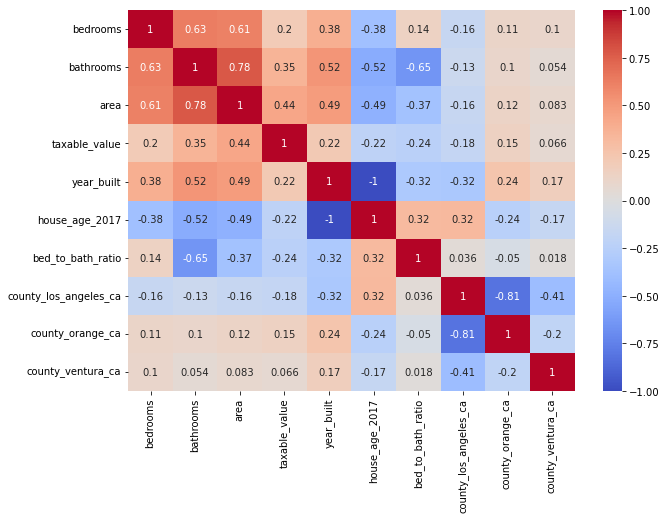

In [64]:
# Perform a Pearson Correlation on the dataset
plt.figure(figsize=(10,7))
correlate = train.corr()
sns.heatmap(correlate, annot=True, cmap='coolwarm')
plt.show()

- area and bathrooms seem to have a higher correlation to taxable_values

In [ ]:
train.head()

### Does county affect price?

In [ ]:
train.county.value_counts()

In [ ]:
train_la = train[train.county == 'los_angeles_ca']

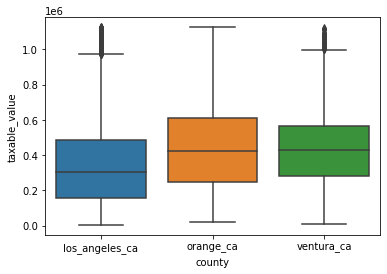

In [66]:
sns.boxplot('county','taxable_value',data=train)
plt.title('Distribution of Tax assessed value by county')
plt.show()

### Does the size of the house (area) affect price?

In [ ]:
sns.violinplot(x='taxable_value', y='area', data=train)
plt.show()

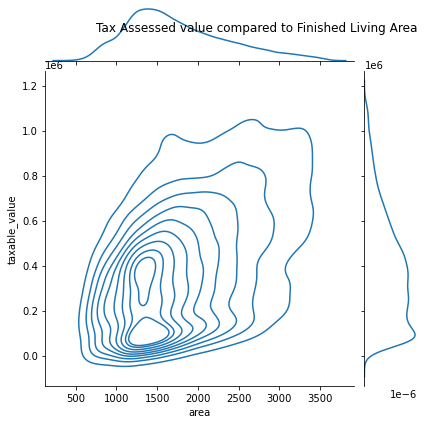

In [103]:
sns.jointplot(x='area', y='taxable_value', data=train, kind='kde')
plt.show()

In [74]:
# sns.swarmplot(x='taxable_value', y='area', data=train)
# plt.show()

### Does the age affect price?

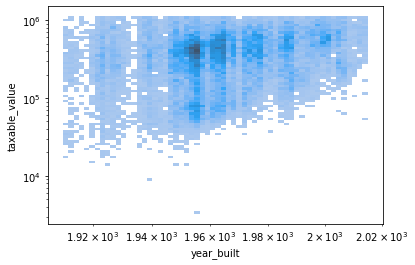

In [88]:
sns.histplot(x=('year_built', y='taxable_value', data=train, log_scale=True)
plt.show()

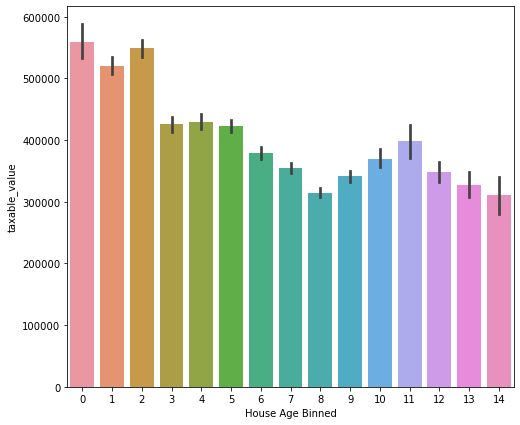

In [116]:
train_age = train.copy()
train_age['house_age_2017'] = pd.cut(train_age.house_age_2017, 15,labels=False)
plt.figure(figsize=(8,7))
sns.barplot(x='house_age_2017', y='taxable_value', data=train_age)
plt.xlabel('House Age Binned')
plt.show()

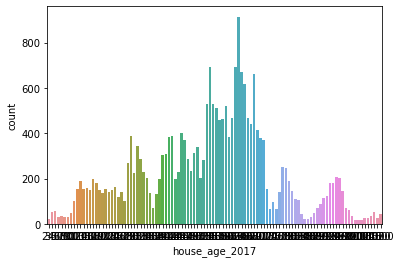

In [78]:
sns.countplot(x='house_age_2017', data=train)
plt.show()

### Does the ratio of bedrooms and bathrooms affect price? 

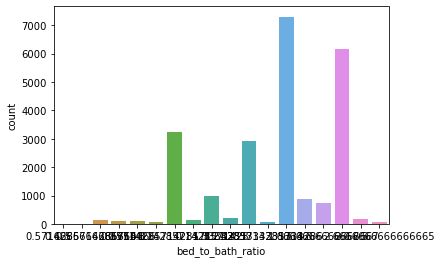

In [79]:
sns.countplot(x='bed_to_bath_ratio', data=train)
plt.show()

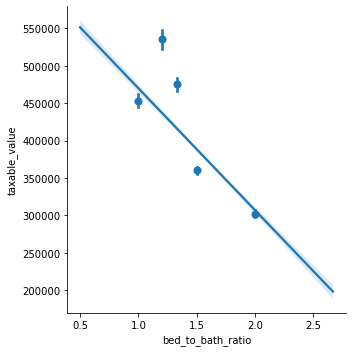

In [80]:
sns.lmplot(x='bed_to_bath_ratio', y='taxable_value', data=train, scatter=True,x_bins=10)
plt.show()

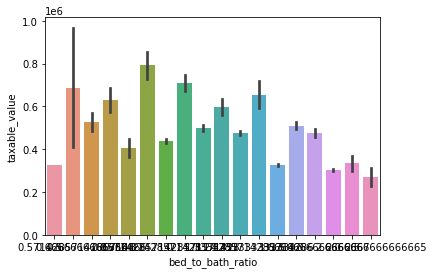

In [81]:
sns.barplot(x='bed_to_bath_ratio', y='taxable_value', data=train)
plt.show()

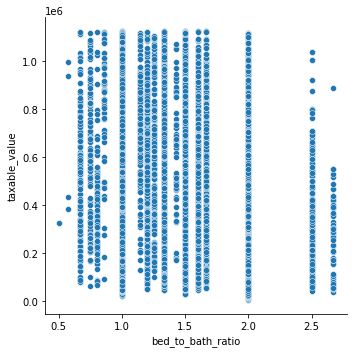

In [82]:
sns.relplot(x='bed_to_bath_ratio', y='taxable_value', data=train, kind='scatter')
plt.show()

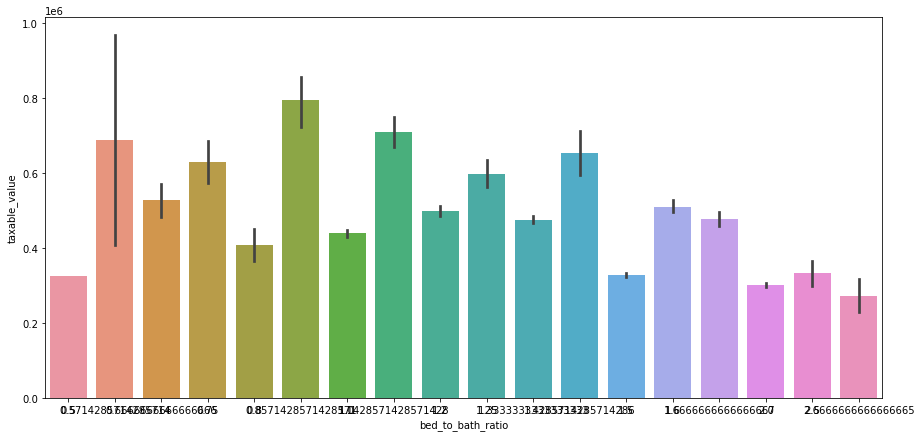

In [122]:
train_ratio = train.copy()
train_ratio['bed_to_bath_ratio'] = pd.cut(train_ratio.bed_to_bath_ratio, 20,labels=False)
plt.figure(figsize=(15,7))
sns.barplot(x='bed_to_bath_ratio', y='taxable_value', data=train)
plt.show()

- Summary: 

# Hypothesis Testing

# Feature Engineering

## SelectKBest

In [32]:
# We use SelectKBest to run a f_regression stats test and return the top 3
f_selector = SelectKBest(f_regression, k=3)

# We fit this to our data
f_selector.fit(X_train_scaled, y_train)

# Create a boolean mask to find out which were selected
feature_mask = f_selector.get_support()

# We get a list of the top 3 features by name
f_feature = X_train_scaled.iloc[:,feature_mask].columns.tolist()

f_feature

['bathrooms', 'area', 'bed_to_bath_ratio']

## Recursive Feature Elimination: 
We iteratively create models starting with all features and remove the lowest performing on each iteration until we have reach the desired n_features.


In [33]:
# initialize Linear Regression model
lm = LinearRegression()

# Create Recursive Feature Elimination model
rfe = RFE(lm, n_features_to_select=3)

# fit the model
rfe.fit(X_train_scaled, y_train)

# get mask of columns selected
feature_mask = rfe.support_

# get list of selected column names
rfe_feature = X_train_scaled.iloc[:,feature_mask].columns.tolist()

rfe_feature

['area', 'year_built', 'house_age_2017']

In [34]:
# Create list of variables and their ranking

# ranks
var_ranks = rfe.ranking_

# names
var_names = X_train_scaled.columns.tolist()

# combine to dataframe
rfe_ranks_df = pd.DataFrame({'Variable' : var_names, 'Rank' : var_ranks})

# sort
rfe_ranks_df.sort_values('Rank')

,Variable,Rank
2,area,1
3,year_built,1
4,house_age_2017,1
0,bedrooms,2
1,bathrooms,3
5,bed_to_bath_ratio,4


# Feature Engineeering Extended

## Find Optimum number of features with RFE

In [ ]:
number_of_features_list=np.arange(1,3)
high_score=0
number_of_features=0
score_list=[]

for n in range(len(number_of_features_list)):
    lm = LinearRegression()
    rfe = RFE(lm,number_of_features_list[n])
    X_train_rfe = rfe.fit_transform(X_train_scaled,y_train)
    X_test_rfe = rfe.transform(X_test_scaled)
    lm.fit(X_train_rfe,y_train)
    score = lm.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        number_of_features = number_of_features_list[n]
        
print('Optimum number of features: %d' % number_of_features)
print('Score with %d features: %f' % (number_of_features, high_score))

## Backward Elimination using OLS

In [ ]:
# create OLS object
ols_model = sm.OLS(y_train, X_train_scaled)

# fit model
fit = ols_model.fit()

# summarize
fit.summary()

## Using OLS above for backwards elimination


In [ ]:
cols = list(X_train_scaled.columns)
pmax = 1
while (len(cols)>0):
    p = []
    X_1 = X_train_scaled[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y_train,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)
    pmax = max(p)
    feature_with_p_max = p.max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

Nothing important to note

## Embedded Methods

## Lasso regularization

In [ ]:
# reg = MultiTaskLassoCV()
# reg.fit(X_train_scaled, y_train)

# print(f'best alpha {reg.alpha_}')
# print(f'best score {reg.score(X_train_scaled,y_train)}')
# coef = pd.Series(reg.coef_, index = X_train_scaled.columns)

# print('pick ' + str(sum(coef !=0)) + ' and kick ' + str(sum(coef==0)))

In [ ]:
# imp_coef = coef.sort_values()

# import matplotlib

# matplotlib.rcParams['figure.figsize'] = (4.0,5.0)
# imp_coef.plot(kind = "barh")
# plt.title('Lasso Feature Importance')
# plt.show()

## Linear Dimensionality Reduction

## Principal Component Analysis

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=1729)
pca.fit(X_train_scaled)
X = pca.transform(X_train_scaled)
print(pca.n_components_)
print(len(X))
print(pca.explained_variance_ratio_)
print(X[0:5])

# Build Models

### Baseline

In [35]:
# Predict taxable_value_pred_mean
taxable_value_pred_mean = y_train['taxable_value'].mean()
y_train['taxable_value_pred_mean'] = taxable_value_pred_mean
y_validate['taxable_value_pred_mean'] = taxable_value_pred_mean

# compute taxable_value_pred_median
taxable_value_pred_median = y_train['taxable_value'].median()
y_train['taxable_value_pred_median'] = taxable_value_pred_median
y_validate['taxable_value_pred_median'] = taxable_value_pred_median

# RMSE of taxable_value_pred_mean
rmse_train = mean_squared_error(y_train.taxable_value, y_train.taxable_value_pred_mean)**(1/2)
rmse_validate = mean_squared_error(y_validate.taxable_value, y_validate.taxable_value_pred_mean)**(1/2)

print("RMSE Baseline using Mean\nTrain(In-Sample): ", round(rmse_train, 2), 
      "\nValidate(Out-of-Sample): ", round(rmse_validate, 2))

# RMSE of taxable_value_pred_median
rmse_train = mean_squared_error(y_train.taxable_value, y_train.taxable_value_pred_median)**(1/2)
rmse_validate = mean_squared_error(y_validate.taxable_value, y_validate.taxable_value_pred_median)**(1/2)

print("RMSE using Median\nTrain(In-Sample): ", round(rmse_train, 2), 
      "\nValidate(Out-of-Sample): ", round(rmse_validate, 2))


RMSE Baseline using Mean
Train(In-Sample):  245412.89 
Validate(Out-of-Sample):  247632.63
RMSE using Median
Train(In-Sample):  247647.3 
Validate(Out-of-Sample):  250432.3


- Mean seems to be the better option

### Linear Regression (Ordinary Least Squares)

In [36]:
# create the model object
lm = LinearRegression(normalize=True)

# fit the model
lm.fit(X_train_scaled[['area','bedrooms','bathrooms','year_built']], y_train.taxable_value)

# predict train
y_train['taxable_value_pred_lm'] = lm.predict(X_train_scaled[['area','bedrooms','bathrooms','year_built']])

# evaluate: rmse_train
rmse_train = mean_squared_error(y_train.taxable_value, y_train.taxable_value_pred_lm)**(1/2)

# predict validate
y_validate['taxable_value_pred_lm'] = lm.predict(X_validate_scaled[['area','bedrooms','bathrooms','year_built']])

# evaluate: rmse_validate
rmse_validate = mean_squared_error(y_validate.taxable_value, y_validate.taxable_value_pred_lm)**(1/2)

print("RMSE for Ordinary Least Squares using LinearRegression\nTraining(In-Sample): ", rmse_train, 
      "\nValidation(Out-of-Sample): ", rmse_validate)

RMSE for Ordinary Least Squares using LinearRegression
Training(In-Sample):  219292.13875983964 
Validation(Out-of-Sample):  220905.6652927631


In [37]:
# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model
lm2.fit(X_train_scaled[['area','bed_to_bath_ratio','house_age_2017']], y_train.taxable_value)

# predict train
y_train['taxable_value_pred_lm2'] = lm2.predict(X_train_scaled[['area','bed_to_bath_ratio','house_age_2017']])

# evaluate: rmse_train_2
rmse_train_2 = mean_squared_error(y_train.taxable_value, y_train.taxable_value_pred_lm2)**(1/2)

# predict validate
y_validate['taxable_value_pred_lm2'] = lm2.predict(X_validate_scaled[['area','bed_to_bath_ratio','house_age_2017']])

# evaluate: rmse_validate_2
rmse_validate_2 = mean_squared_error(y_validate.taxable_value, y_validate.taxable_value_pred_lm2)**(1/2)

print("RMSE_2 for Ordinary Least Squares using LinearRegression\nTraining(In-Sample): ", rmse_train_2, 
      "\nValidation(Out-of-Sample): ", rmse_validate_2)

RMSE_2 for Ordinary Least Squares using LinearRegression
Training(In-Sample):  219898.66316630863 
Validation(Out-of-Sample):  221531.8724481555


In [38]:
# create the model object
lm3 = LinearRegression(normalize=True)

# fit the model
lm3.fit(X_train_scaled[['area','year_built']], y_train.taxable_value)

# predict train
y_train['taxable_value_pred_lm3'] = lm3.predict(X_train_scaled[['area','year_built']])

# evaluate: rmse_train_3
rmse_train_3 = mean_squared_error(y_train.taxable_value, y_train.taxable_value_pred_lm3)**(1/2)

# predict validate
y_validate['taxable_value_pred_lm3'] = lm3.predict(X_validate_scaled[['area','year_built']])

# evaluate: rmse_validate_3
rmse_validate_3 = mean_squared_error(y_validate.taxable_value, y_validate.taxable_value_pred_lm3)**(1/2)

print("RMSE for Ordinary Least Squares using LinearRegression\nTraining(In-Sample): ", rmse_train_3, 
      "\nValidation(Out-of-Sample): ", rmse_validate_3)

RMSE for Ordinary Least Squares using LinearRegression
Training(In-Sample):  220835.99571259043 
Validation(Out-of-Sample):  222364.2585832494


### Lasso Lars

In [39]:
# create the model object 
lars = LassoLars(alpha=1.0)

# fit the model 
lars.fit(X_train_scaled[['area','bedrooms','bathrooms','year_built']], y_train.taxable_value)

# predict train
y_train['taxable_value_pred_lars'] = lars.predict(X_train_scaled[['area','bedrooms','bathrooms','year_built']])

# evaluate: rmse_train
rmse_train = mean_squared_error(y_train.taxable_value, y_train.taxable_value_pred_lars)**(1/2)

# predict validate
y_validate['taxable_value_pred_lars'] = lars.predict(X_validate_scaled[['area','bedrooms','bathrooms','year_built']])

# evaluate: rmse_validate
rmse_validate = mean_squared_error(y_validate.taxable_value, y_validate.taxable_value_pred_lars)**(1/2)

print("RMSE for Lasso + Lars\nTraining(In-Sample): ", rmse_train, 
      "\nValidation(Out-of-Sample): ", rmse_validate)

RMSE for Lasso + Lars
Training(In-Sample):  219292.4882450899 
Validation(Out-of-Sample):  220904.9676822525


In [40]:
# create the model object 
lars2 = LassoLars(alpha=1.0)

# fit the model 
lars2.fit(X_train_scaled[['area','bed_to_bath_ratio','house_age_2017']], y_train.taxable_value)

# predict train
y_train['taxable_value_pred_lars2'] = lars2.predict(X_train_scaled[['area','bed_to_bath_ratio','house_age_2017']])

# evaluate: rmse
rmse_train_2 = mean_squared_error(y_train.taxable_value, y_train.taxable_value_pred_lars2)**(1/2)

# predict validate
y_validate['taxable_value_pred_lars2'] = lars2.predict(X_validate_scaled[['area','bed_to_bath_ratio','house_age_2017']])

# evaluate: rmse
rmse_validate_2 = mean_squared_error(y_validate.taxable_value, y_validate.taxable_value_pred_lars2)**(1/2)

print("RMSE for Lasso + Lars\nTraining(In-Sample): ", rmse_train_2, 
      "\nValidation(Out-of-Sample): ", rmse_validate_2)

RMSE for Lasso + Lars
Training(In-Sample):  219898.91922751194 
Validation(Out-of-Sample):  221532.65713535296


In [41]:
# create the model object 
lars3 = LassoLars(alpha=1.0)

# fit the model 
lars3.fit(X_train_scaled[['area','bed_to_bath_ratio','house_age_2017']], y_train.taxable_value)

# predict train
y_train['taxable_value_pred_lars3'] = lars3.predict(X_train_scaled[['area','bed_to_bath_ratio','house_age_2017']])

# evaluate: rmse_train_3
rmse_train_3 = mean_squared_error(y_train.taxable_value, y_train.taxable_value_pred_lars3)**(1/2)

# predict validate
y_validate['taxable_value_pred_lars3'] = lars3.predict(X_validate_scaled[['area','bed_to_bath_ratio','house_age_2017']])

# evaluate: rmse_validate_3
rmse_validate_3 = mean_squared_error(y_validate.taxable_value, y_validate.taxable_value_pred_lars3)**(1/2)

print("RMSE for Lasso + Lars\nTraining(In-Sample): ", rmse_train_3, 
      "\nValidation(Out-of-Sample): ", rmse_validate_3)

RMSE for Lasso + Lars
Training(In-Sample):  219898.91922751194 
Validation(Out-of-Sample):  221532.65713535296


### Tweedie Regressor (Generalized Linear Model)

In [42]:
# create the model object
glm = TweedieRegressor(power=1, alpha=0) 

# fit the model
glm.fit(X_train_scaled[['area','bedrooms','bathrooms','year_built']], y_train.taxable_value)

# predict train
y_train['taxable_value_pred_glm'] = glm.predict(X_train_scaled[['area','bedrooms','bathrooms','year_built']])

# evaluate: rmse_train
rmse_train = mean_squared_error(y_train.taxable_value, y_train.taxable_value_pred_glm)**(1/2)

# predict validate
y_validate['taxable_value_pred_glm'] = glm.predict(X_validate_scaled[['area','bedrooms','bathrooms','year_built']])

# evaluate: rmse_validate
rmse_validate = mean_squared_error(y_validate.taxable_value, y_validate.taxable_value_pred_glm)**(1/2)

print("RMSE for GLM using Tweedie\nTraining(In-Sample): ", rmse_train, 
      "\nValidation(Out-of-Sample): ", rmse_validate)

RMSE for GLM using Tweedie
Training(In-Sample):  219444.48193185162 
Validation(Out-of-Sample):  221428.18076557652


In [43]:
# create the model object
glm2 = TweedieRegressor(power=1, alpha=0)

# fit the model
glm2.fit(X_train_scaled[['area','bed_to_bath_ratio','house_age_2017']], y_train.taxable_value)

# predict train
y_train['taxable_value_pred_glm2'] = glm2.predict(X_train_scaled[['area','bed_to_bath_ratio','house_age_2017']])

# evaluate: rmse_train
rmse_train_2 = mean_squared_error(y_train.taxable_value, y_train.taxable_value_pred_glm2)**(1/2)

# predict validate
y_validate['taxable_value_pred_glm2'] = glm2.predict(X_validate_scaled[['area','bed_to_bath_ratio','house_age_2017']])

# evaluate: rmse_validate
rmse_validate_2 = mean_squared_error(y_validate.taxable_value, y_validate.taxable_value_pred_glm2)**(1/2)

print("RMSE for GLM using Tweedie\nTraining(In-Sample): ", rmse_train_2, 
      "\nValidation(Out-of-Sample): ", rmse_validate_2)

RMSE for GLM using Tweedie
Training(In-Sample):  219497.92327972697 
Validation(Out-of-Sample):  221441.94460881656


In [44]:
# create the model object
glm3 = TweedieRegressor(power=1, alpha=0)

# fit the model
glm3.fit(X_train_scaled[['area','year_built']], y_train.taxable_value)

# predict train
y_train['taxable_value_pred_glm3'] = glm3.predict(X_train_scaled[['area','year_built']])

# evaluate: rmse_train
rmse_train_3 = mean_squared_error(y_train.taxable_value, y_train.taxable_value_pred_glm3)**(1/2)

# predict validate
y_validate['taxable_value_pred_glm3'] = glm3.predict(X_validate_scaled[['area','year_built']])

# evaluate: rmse_validate
rmse_validate_3 = mean_squared_error(y_validate.taxable_value, y_validate.taxable_value_pred_glm3)**(1/2)

print("RMSE for GLM using Tweedie\nTraining(In-Sample): ", rmse_train_3, 
      "\nValidation(Out-of-Sample): ", rmse_validate_3)

RMSE for GLM using Tweedie
Training(In-Sample):  220690.65184492467 
Validation(Out-of-Sample):  222497.40319002882


### Polynomial Regression

In [45]:
# make the polynomial features 
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train_scaled[['area','bedrooms','bathrooms','year_built']])

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate_scaled[['area','bedrooms','bathrooms','year_built']])
X_test_degree2 = pf.transform(X_test_scaled[['area','bedrooms','bathrooms','year_built']])

In [46]:
# create the model
plm = LinearRegression(normalize=True)

# fit the model
plm.fit(X_train_degree2, y_train.taxable_value)

# predict train
y_train['taxable_value_pred_plm'] = plm.predict(X_train_degree2)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.taxable_value, y_train.taxable_value_pred_plm)**(1/2)

# predict validate
y_validate['taxable_value_pred_plm'] = plm.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.taxable_value, y_validate.taxable_value_pred_plm)**(1/2)

print("RMSE for Polynomial Model, degrees=2\nTraining(In-Sample): ", rmse_train, 
      "\nValidation(Out-of-Sample): ", rmse_validate)

RMSE for Polynomial Model, degrees=2
Training(In-Sample):  218289.83036623642 
Validation(Out-of-Sample):  220025.56808972612


In [51]:
y_test_scaled = pd.DataFrame(y_test)

# predict on test
y_test['taxable_value_pred_plm'] = plm.predict(X_test_degree2)

# evaluate: rmse
rmse_test = mean_squared_error(y_test.taxable_value, y_test.taxable_value_pred_plm)**(1/2)

print("RMSE for Polynomial Model, degrees=2\nTest(Out-of-Sample): ", rmse_test)


RMSE for Polynomial Model, degrees=2
Test(Out-of-Sample):  218904.64295019858
